In [1]:
suppressMessages(suppressWarnings(source("../config_duke.R")))

You are on Duke Server: DCC
BASE DIRECTORY:     /work/kk319 
WORK DIRECTORY:     /work/kk319/out/CombEffect_STARR 
LOG  DIRECTORY:     /work/kk319/out/CombEffect_STARR/log 
PATH OF SOURCE:     /work/kk319/source 
PATH OF EXECUTABLE: /work/kk319/exe 
PATH OF ANNOTATION: /work/kk319/annotation 


In [3]:
FD_DAT=file.path(FD_WRK, "kmer")
Sys.glob(file.path(FD_DAT, "dat_cnt*"))

[1] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dex_per1.csv"        
[2] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dex_per1_bstrp.csv"  
[3] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dmso_per1.csv"       
[4] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_dmso_per1_bstrp.csv" 
[5] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_input_per1.csv"      
[6] "/work/kk319/out/CombEffect_STARR/kmer/dat_cnt_input_per1_bstrp.csv"

## Import count tables

In [4]:
### import data
dat_cnt_input_per1 = read_csv(file.path(FD_DAT, "dat_cnt_input_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  Input1 = col_double(),
  Input2 = col_double(),
  Input3 = col_double(),
  Input4 = col_double(),
  Input5 = col_double()
)


In [5]:
dat_cnt_dmso_per1  = read_csv(file.path(FD_DAT, "dat_cnt_dmso_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  TFX2_DMSO = col_double(),
  TFX3_DMSO = col_double(),
  TFX4_DMSO = col_double(),
  TFX5_DMSO = col_double()
)


In [6]:
dat_cnt_dex_per1   = read_csv(file.path(FD_DAT, "dat_cnt_dex_per1.csv"))

Parsed with column specification:
cols(
  Chrom = col_character(),
  Start = col_double(),
  End = col_double(),
  TFX2_Dex = col_double(),
  TFX3_Dex = col_double(),
  TFX4_Dex = col_double(),
  TFX5_Dex = col_double()
)


## Helper functions

In [11]:
### dispersion phi = mu^2 / (var - mu)
get_dispersion = function(m, v){return(m^2 / (v - m))}

## plot count distribution

In [48]:
mat = dat_cnt_dmso_per1 %>% dplyr::select(-Chrom, -Start, -End)
head(mat,3)

TFX2_DMSO,TFX3_DMSO,TFX4_DMSO,TFX5_DMSO
11,14,5,4
12,14,5,4
12,14,5,4


In [49]:
dat = mat %>% gather(Sample, Value)
print(dim(dat))

dat = dat %>% na.omit
print(dim(dat))

[1] 8076    2
[1] 7048    2


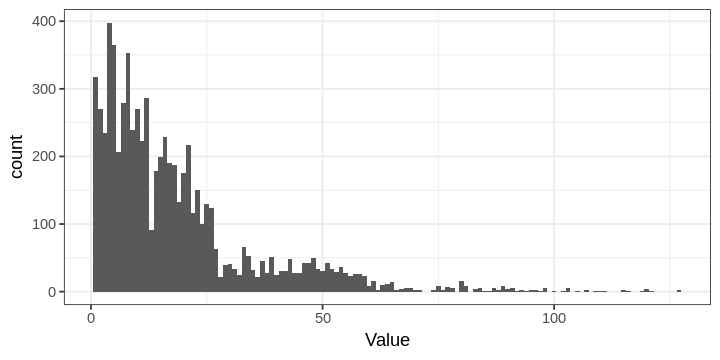

In [50]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=Value)) + geom_histogram(binwidth = 1) + theme_bw()

In [51]:
m = mean(dat$Value)
v = var(dat$Value)
phi = get_dispersion(m, v)

In [52]:
x = 1:150
y = dnbinom(x, mu=m, size=phi)
tmp = data.frame(x, y)

Warning message:
“Removed 24 rows containing non-finite values (stat_count).”Warning message:
“Removed 50 rows containing missing values (position_stack).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

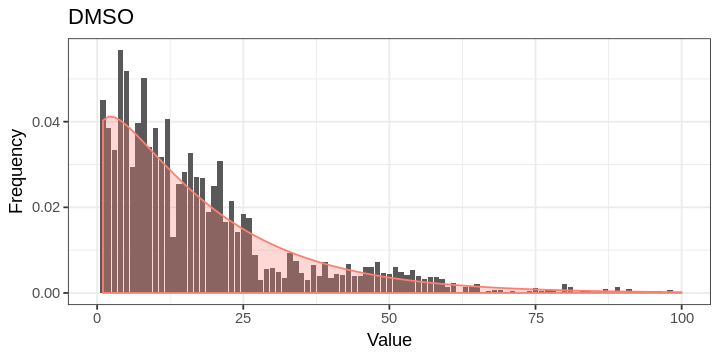

In [54]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot() + 
    geom_bar(data=dat, aes(x=Value, y=(..count..)/sum(..count..))) + 
    geom_area(data=tmp, aes(x=x, y=y),
              fill="#fb8072", 
              color="#fb8072", 
              alpha=0.3) +
    xlim(0,100) +
    theme_bw() +
    labs(title="DMSO", y="Frequency")

In [55]:
m = mean(dat$Value)
v = var(dat$Value)
x = MASS::rnegbin(n=5000, mu = m, theta = get_dispersion(m, v))

print(m)
print(v)

[1] 18.47673
[1] 308.7748


Warning message:
“Removed 24 rows containing non-finite values (stat_count).”Warning message:
“Removed 10 rows containing non-finite values (stat_density).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

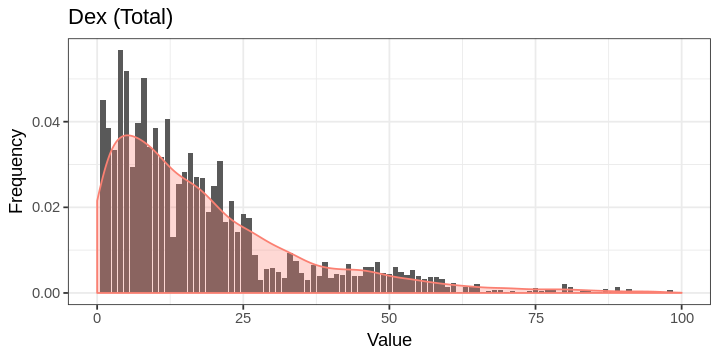

In [57]:
tmp = data.frame(x)

options(repr.plot.height=3, repr.plot.width=6)
ggplot() + 
    geom_bar(data=dat, aes(x=Value, y=(..count..)/sum(..count..))) + 
    geom_density(data=tmp, aes(x=x), 
                 adjust = 1,
                 fill="#fb8072", 
                 color="#fb8072", 
                 alpha=0.3) +
    labs(title="Dex (Total)", y="Frequency") +  
    xlim(0,100) +
    theme_bw()

In [58]:
mat = dat_cnt_dex_per1 %>% dplyr::select(-Chrom, -Start, -End)
dat = mat %>% gather(Sample, Value)
print(dim(dat))

dat = dat %>% na.omit
print(dim(dat))

[1] 7980    2
[1] 6816    2


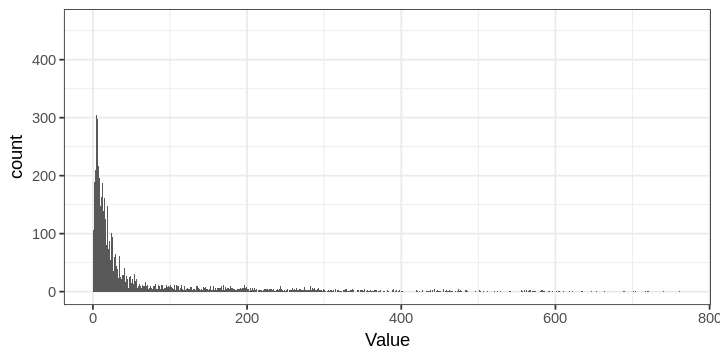

In [59]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot(dat, aes(x=Value)) + geom_histogram(binwidth = 1) + theme_bw()

In [60]:
m = mean(dat$Value)
v = var(dat$Value)
phi = get_dispersion(m, v)

In [61]:
x = 1:150
y = dnbinom(x, mu=m, size=phi)
tmp = data.frame(x, y)

Warning message:
“Removed 1204 rows containing non-finite values (stat_count).”Warning message:
“Removed 50 rows containing missing values (position_stack).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

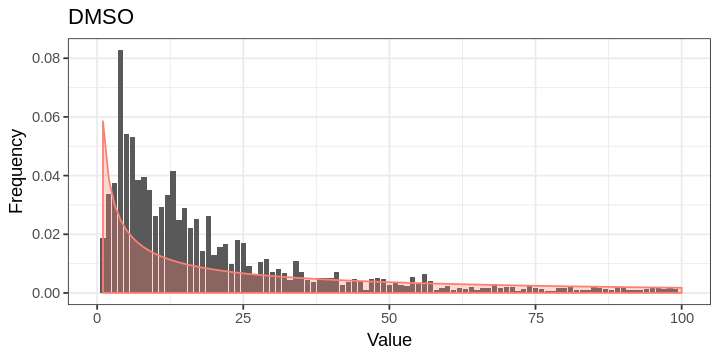

In [62]:
options(repr.plot.height=3, repr.plot.width=6)
ggplot() + 
    geom_bar(data=dat, aes(x=Value, y=(..count..)/sum(..count..))) + 
    geom_area(data=tmp, aes(x=x, y=y),
              fill="#fb8072", 
              color="#fb8072", 
              alpha=0.3) +
    xlim(0,100) +
    theme_bw() +
    labs(title="DMSO", y="Frequency")

In [63]:
m = mean(dat$Value)
v = var(dat$Value)
x = MASS::rnegbin(n=5000, mu = m, theta = get_dispersion(m, v))

print(m)
print(v)

[1] 60.2299
[1] 10934.86


Warning message:
“Removed 903 rows containing non-finite values (stat_count).”Warning message:
“Removed 600 rows containing non-finite values (stat_density).”Warning message:
“Removed 1 rows containing missing values (geom_bar).”

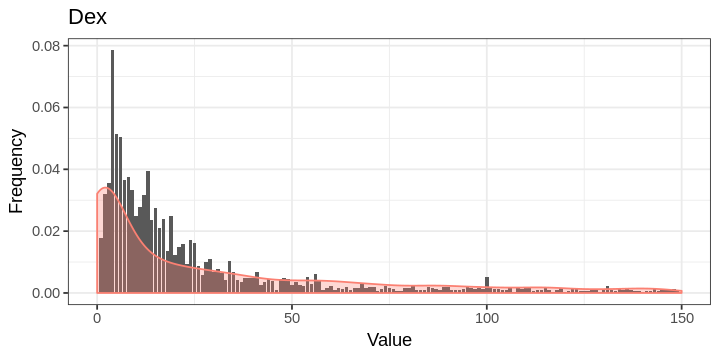

In [66]:
tmp = data.frame(x)

options(repr.plot.height=3, repr.plot.width=6)
ggplot() + 
    geom_bar(data=dat, aes(x=Value, y=(..count..)/sum(..count..))) + 
    geom_density(data=tmp, aes(x=x), 
                 adjust = 1,
                 fill="#fb8072", 
                 color="#fb8072", 
                 alpha=0.3) +
    labs(title="Dex", y="Frequency") +  
    xlim(0,150) +
    theme_bw()